# Linear regression with Statsmodels

---

## Import libraries

In [4]:
# regression analysis
import statsmodels.api as sm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
plt.style.use('fivethirtyeight')
# Import authenticator and gspread to manage g-sheets
from oauth2client.service_account import ServiceAccountCredentials
from google.oauth2 import service_account
from google.cloud import bigquery
# disable warnings display
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [5]:
# Read google credentials
api = '../APIS/arkham-538.json'
# connect to big query
bq_credentials = service_account.Credentials.from_service_account_file(api)
project_id = 'arkham-538'
client = bigquery.Client(credentials=bq_credentials,project=project_id)

In [7]:
# read data from big query
query = '''
    SELECT * 
    FROM `arkham-538.portfolio_datasets.gpa_dataset`
'''
# convert query to pandas dataframe
data = pd.read_gbq(query, credentials=bq_credentials)

In [8]:
# Describe data
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Define inputs and targets

In [6]:
# Define the dependent variable to be the GPA
y = data['GPA']
# Define the independent variable to be the SAT score
x1 = data['SAT']

## Run the regression

In [7]:
# Add a new column (equal in lenght to x1) consisting only of ones
x = sm.add_constant(x1)
x.head()

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693


In [8]:
# Fit the model, according to the OLS (ordinary least squares) method 
# where y is a dependent variable and x is an idependent variable
results = sm.OLS(y,x).fit()

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           7.20e-11
Time:                        08:54:46   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
print("f Parameters: ", list(results.params))
print("Standard errors: ", list(results.bse))
print("Predicted values:\n", results.predict())

f Parameters: ({list(results.params)}
Standard errors:  [0.40873941685437154, 0.0002211557670340507]
Predicted values:
 [3.11288962 3.03010522 3.18905127 3.06487466 3.07812017 3.04003934
 3.19567402 3.19567402 3.24203329 3.33806319 3.14765907 3.21388659
 3.14765907 3.10957824 3.21057521 3.37448833 3.18077283 3.0466621
 3.32481769 3.23209916 3.19070696 3.12613512 3.02844953 3.06818604
 3.54336851 3.29832668 3.23375485 3.29004824 3.61953016 3.24534466
 3.20395246 3.47714099 3.21388659 3.34634163 3.38773383 3.3364075
 3.26852429 3.51025475 3.21719796 3.30660512 3.36289851 3.33806319
 3.53012301 3.09302136 3.56985952 3.4622398  3.2950153  3.51356613
 3.34965301 3.55164695 3.25859017 3.34634163 3.43243741 2.98043457
 3.38607815 3.39932365 3.13938063 3.50859906 3.22382072 3.4059464
 3.52681163 3.26852429 3.40925778 3.65429961 3.40925778 3.30826081
 3.33806319 3.47714099 3.35627576 3.47217392 3.4754853  3.21885365
 3.5450242  3.47714099 3.62118585 3.61125172 3.58144934 3.61953016
 3.32647338 

In [27]:
print(f'Constant coefficient: {results.params[0]:.4f}')
print(f'Slope coefficient: {results.params[1]:.4f}')

Constant coefficient: 0.2750
Slope coefficient: 0.0017


In [26]:
print(f'F-stat: {sm.stats.linear_rainbow(results)[0]:.4f}')
print(f'p-value: {sm.stats.linear_rainbow(results)[1]:.4f}')

F-stat: 11.2412
p-value: 0.0000


<Axes: xlabel='GPA', ylabel='SAT'>

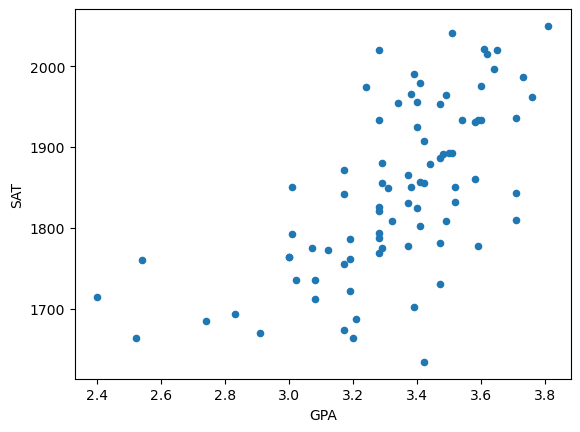

In [56]:
data.plot(kind='scatter', x='GPA', y='SAT')